In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score
import imblearn

%matplotlib inline

In [2]:
df_train = pd.read_csv("train_dataset_train.csv")

In [3]:
df_train.head()

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0


In [4]:
df_train['Class'].value_counts()

0     2731040
3     1287816
4      103453
5       55985
1       39384
64       4416
Name: Class, dtype: int64

In [5]:
df_train.shape

(4222094, 6)

In [ ]:
plt.boxplot(x=df_train['Northing'])
#plt.boxplot(x=df_train['Easting'])
#plt.boxplot(x=df_train['Northing'])
#plt.boxplot(x=df_train['Height'])
#plt.boxplot(x=df_train['Reflectance'])

In [6]:
df_train.describe().applymap(lambda x: f"{x:0.3f}")

,id,Easting,Northing,Height,Reflectance,Class
count,4222094.000,4222094.000,4222094.000,4222094.000,4222094.000,4222094.000
mean,3016930.820,431706.773,6032307.734,69.402,-10.531,1.156
std,1741258.214,29.773,29.815,2.270,4.515,2.535
min,1206.000,431629.442,6032231.746,60.414,-37.960,0.000
25%,1509237.750,431682.515,6032283.629,67.791,-12.630,0.000
50%,3016603.000,431706.870,6032307.267,69.205,-9.940,0.000
75%,4525054.250,431730.758,6032332.144,69.299,-7.730,3.000
max,6032767.000,431781.171,6032383.729,133.719,4.360,64.000


In [7]:
df_train.isna().sum()

id             0
Easting        0
Northing       0
Height         0
Reflectance    0
Class          0
dtype: int64

In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train.drop(columns='id').duplicated().sum()

0

Text(0.5, 1.0, 'Распределение класса точки')

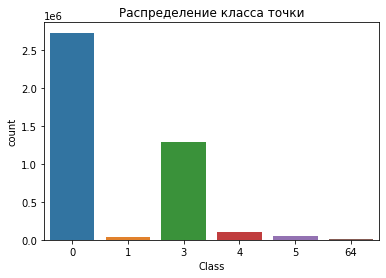

In [10]:
sns.countplot(x = "Class",data  = df_train).set_title('Распределение класса точки')

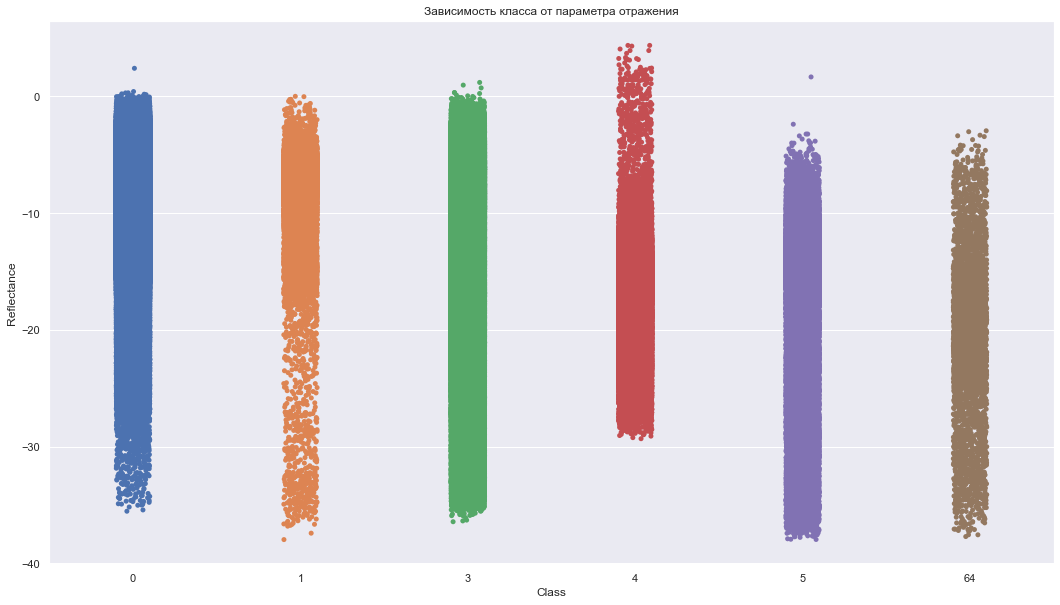

In [11]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

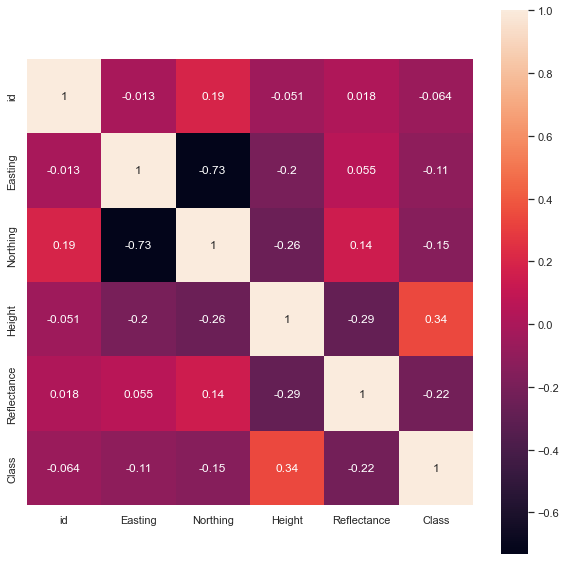

In [12]:
plt.rcParams['figure.figsize']=(10,10)
g = sns.heatmap(df_train.corr(), square = True, annot=True)